In [41]:
#Importing modules
import Quandl
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import seaborn as sns
sns.set(color_codes=True, font_scale = 1.5)

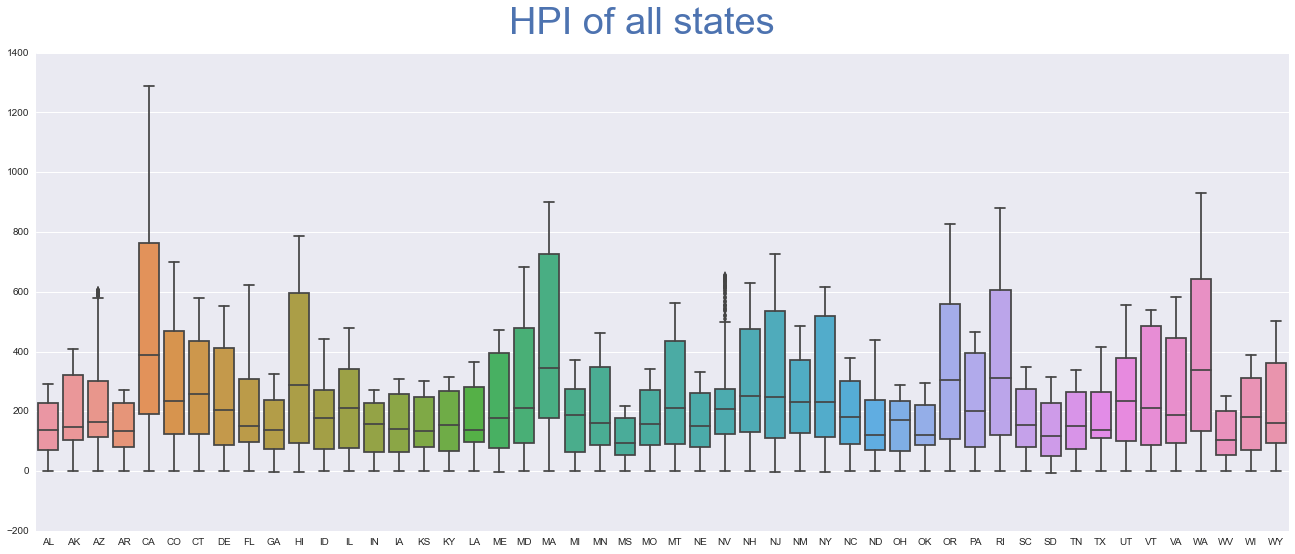

In [2]:
#Using my authorization token for Quandl
auth_token = open("auth_key.txt",'r').read()

#Creating a List of abbreviation of each state
# def list_states():
#     df = pd.read_html("http://www.50states.com/abbreviations.htm#.VnM8VfkrLIU")
#     df_states = pd.DataFrame(df[0])
#     df_states = df_states.iloc[1:51][1]
#     #list_states = df_states["Abbreviation"]
#     list_states = np.array(df_states)
#     return list_states

# #Getting house prices of all states from Quandl by modifying its get function
# def house_price_all_states():
#     main_df = pd.DataFrame()
#     states = list_states()
#     for abbv in states:
#         df = Quandl.get("FMAC/HPI_"+str(abbv), authtoken = auth_token)
#         df[abbv] = ((df[abbv]-df[abbv][0])/df[abbv][0]) * 100
#         if main_df.empty:
#             main_df = df
#         else:
#             main_df = main_df.join(df)
#     main_df.to_pickle("fiddy_state.pickle") #Pickling the data to reduce run time
# house_price_all_states()

HPI_All_States = pd.read_pickle("fiddy_state.pickle")

#Plotting Boxplot of percent change of each state
plt.figure(figsize=(20,8))
sns.boxplot(data=HPI_All_States)
plt.suptitle("HPI of all states", x=0.5,y=0.98, color = 'b', size = 38)
plt.show()

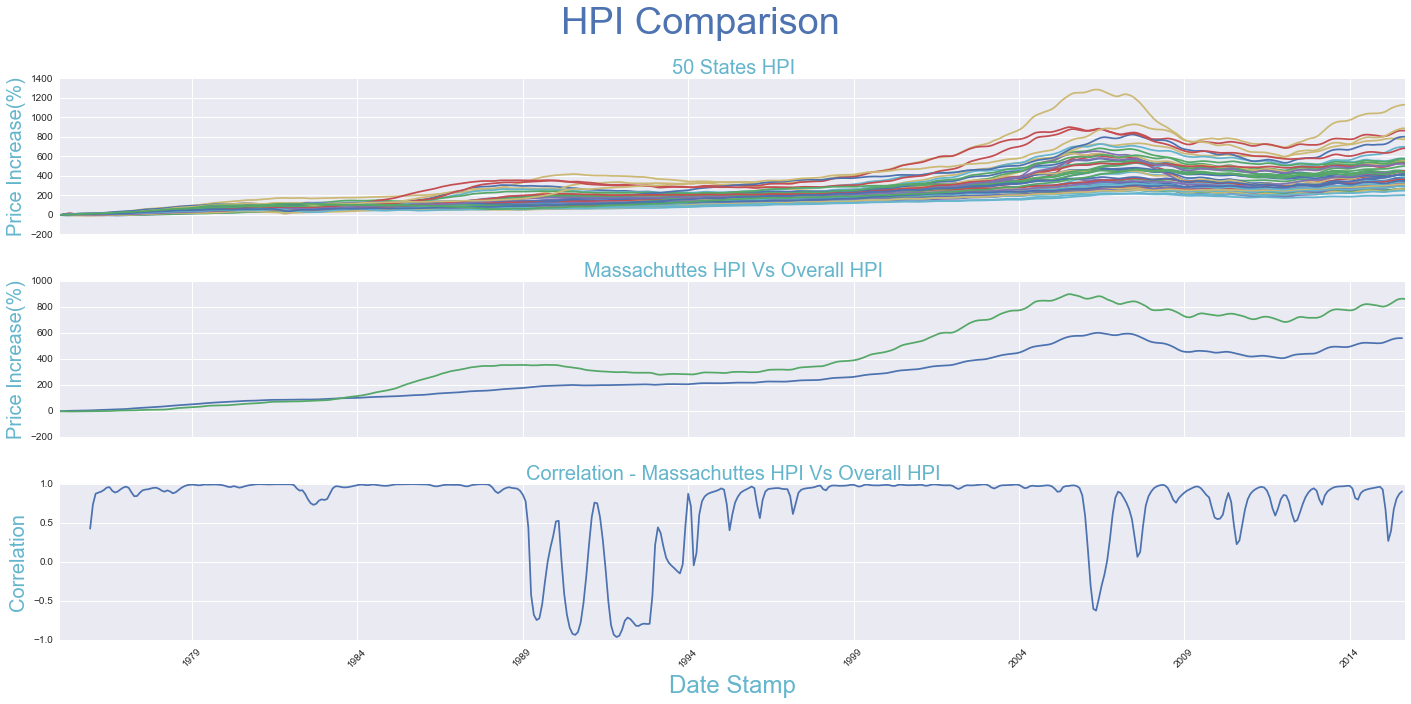

In [3]:
#Gathering US house price data
def benchmark():
    df = Quandl.get("FMAC/HPI_USA", authtoken = auth_token)
    df.columns = ["US_HPI"]
    #Scaling data points
    df["US_HPI"] = ((df["US_HPI"]-df["US_HPI"][0])/df["US_HPI"][0]) * 100
    return df

HPI_US = benchmark()
HPI_US["US_HPI_Future"] = HPI_US["US_HPI"].shift(-1)
HPI_US.dropna(inplace = True)
fig = plt.figure()
plt.figure(figsize=(20,10))

#Plotting all states HPI and correlation between MA and US HPI
plt.suptitle("HPI Comparison", x=0.5,y=0.98, color = 'b', size = 38)
ax1 =  plt.subplot2grid((3,1),(0,0))
HPI_All_States.plot(legend = False, fig = fig, ax = ax1)
ax1.set_title('50 States HPI', color = 'c', size = 20)
ax1.set_ylabel("Price Increase(%)", color = 'c', size = 20)

ax2 = plt.subplot2grid((3,1),(1,0), sharex = ax1)
HPI_US["US_HPI_Future"].plot(ax = ax2, label = 'Future HPI' )
HPI_All_States['MA'].plot(ax = ax2, label = 'MA HPI')
ax2.set_title('Massachuttes HPI Vs Overall HPI', color = 'c', size = 20)
ax2.set_ylabel("Price Increase(%)", color = 'c', size = 20)

ax3 = plt.subplot2grid((3,1),(2,0), sharex = ax1)
HPI_corr = pd.rolling_corr(HPI_All_States['MA'], HPI_US["US_HPI_Future"], 12)
HPI_corr.plot(ax = ax3, label = 'Correlation')
ax3.set_title('Correlation - Massachuttes HPI Vs Overall HPI', color = 'c', size = 20)
for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)
ax3.set_xlabel("Date Stamp", color = 'c', size = 24)
ax3.set_ylabel("Correlation", color = 'c', size = 20)

plt.subplots_adjust(left=0.056, bottom=0.10, right=0.99, top=0.88, wspace=0.0, hspace=0.3)      
plt.show()

C:\Users\ArchishmanMitra\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
C:\Users\ArchishmanMitra\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
C:\Users\ArchishmanMitra\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


C:\Users\ArchishmanMitra\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


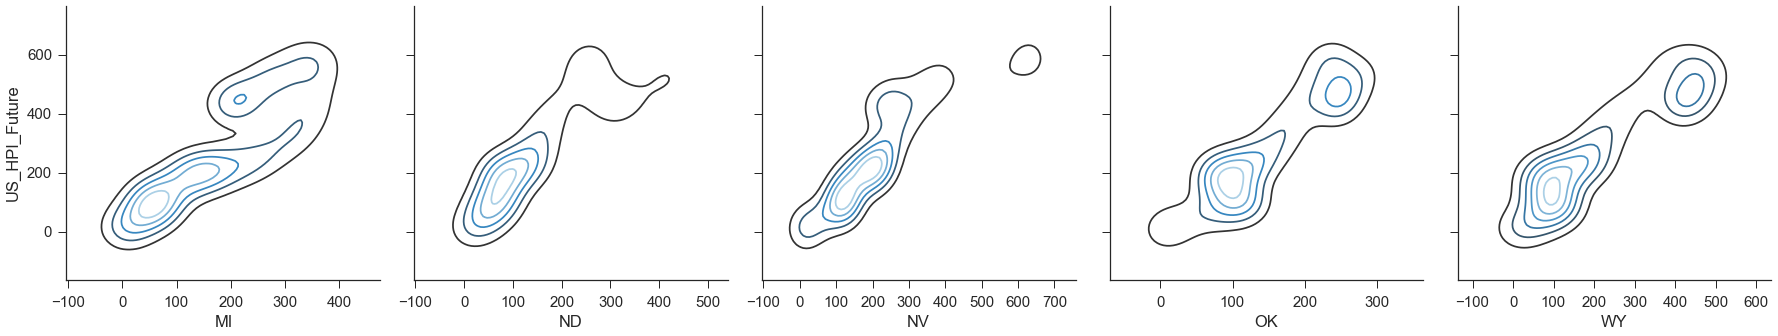

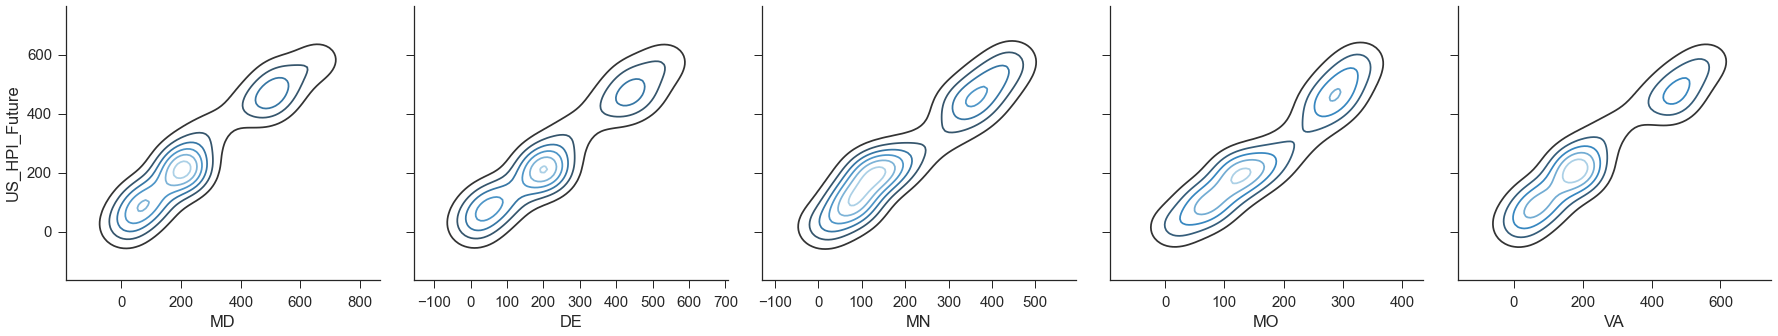

In [43]:
HPI_combined = HPI_All_States.join(HPI_US["US_HPI_Future"])
HPI_combined.dropna(inplace = True)
HPI_corr = HPI_combined.corr()
HPI_corr = HPI_corr.iloc[0:50]["US_HPI_Future"]
#print(HPI_corr)
Least_corr_states = (HPI_corr.sort(inplace = False)).head(5)
Least_corr_states = list(Least_corr_states.index.values)
Highest_corr_states = (HPI_corr.sort(inplace = False)).tail(5)
Highest_corr_states = list(Highest_corr_states.index.values)

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.suptitle("Least Correlated States HPI Vs US HPI", x=0.5,y=0.96, color = 'b', size = 38)
for num in range(np.int(len(Least_corr_states)/5)):
    g = sns.PairGrid(HPI_combined, x_vars= Least_corr_states[num:num+5], y_vars=["US_HPI_Future"], palette="Set2", size = 5)
    g.map(sns.kdeplot, cmap="Blues_d", n_levels=6)
for num in range(np.int(len(Highest_corr_states)/5)):
    g = sns.PairGrid(HPI_combined, x_vars= Highest_corr_states[num:num+5], y_vars=["US_HPI_Future"], palette="Set2", size = 5)
    g.map(sns.kdeplot, cmap="Blues_d", n_levels=6)
plt.show()

C:\Users\ArchishmanMitra\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


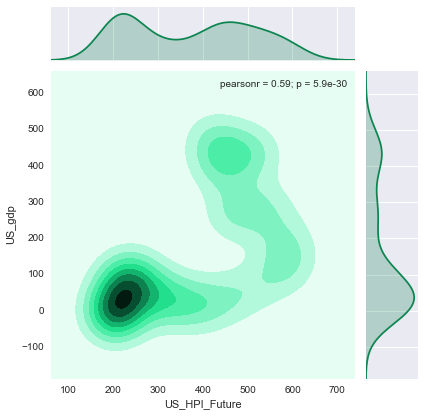

In [17]:
#Getting US GPD data
def gdp():
    df = Quandl.get("BCB/4385", authtoken=auth_token, trim_start="1974-12-31")
    df.columns = ["US_gdp"]
    #Scaling data points
    df["US_gdp"] = ((df["US_gdp"]-df["US_gdp"][0])/df["US_gdp"][0]) * 100
    return df

US_GDP = gdp()
HPI_combined = HPI_combined.join(US_GDP["US_gdp"])
HPI_combined.dropna(inplace = True)
sns.jointplot(x=HPI_combined["US_HPI_FutureUS_HPI_Future"], y=HPI_combined["US_gdp"], kind = 'kde', color="#0d8551");

C:\Users\ArchishmanMitra\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


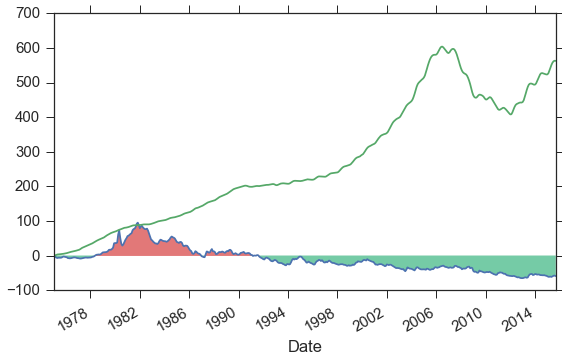

In [61]:
#Getting US Mortgage rates data
def mortgage_30():
    df = Quandl.get("FMAC/MORTG", authtoken = auth_token, trim_start = "1975-01-01")
    df.columns = ["Mortage_Rates"]
    #Scaling and adjusting data points
    df["Mortage_Rates"] = ((df["Mortage_Rates"]-df["Mortage_Rates"][0])/df["Mortage_Rates"][0]) * 100
    df = df.resample('D')
    df = df.resample('M')
    return df
US_Mortgage = mortgage_30()
HPI_combined = HPI_combined.join(US_Mortgage)
HPI_combined.dropna(inplace = True)
#sns.set_style("ticks", {"xtick.size": 10000, "ytick.minor.size": 8})
#sns.distplot(US_Mortgage)
ax1 =  plt.subplot2grid((1,1),(0,0))
ax1.plot(HPI_combined.index, HPI_combined.Mortage_Rates)
ax1.fill_between(HPI_combined.index, HPI_combined.Mortage_Rates, 0, where=(HPI_combined.Mortage_Rates > 0), 
                 alpha = 0.6, color = '#d01f1f')
ax1.fill_between(HPI_combined.index, HPI_combined.Mortage_Rates, 0, where=(HPI_combined.Mortage_Rates < 0),
                 alpha = 0.6, color = '#19a96b')
HPI_combined['US_HPI_Future'].plot(ax = ax1, label = 'US HPI')
plt.show()

In [ ]:
# #Getting US Unemployment data
# def unemployment():
#     df = Quandl.get("ECPI/JOB_G", authtoken = auth_token, trim_start = "1975-01-01")
#     df.columns = ["Unemployment"]
#     #Scaling and adjusting data points
#     df["Unemployment"] = ((df["Unemployment"]-df["Unemployment"][0])/df["Unemployment"][0]) * 100
#     df = df.resample('D')
#     df = df.resample('M')
#     return df


# def sp500():
#     df = Quandl.get("YAHOO/INDEX_GSPC", authtoken = auth_token)
#     print(df)
#     df.columns = ["United States"]
#     df["United States"] = ((df["United States"]-df["United States"][0])/df["United States"][0]) * 100
#     return df
# #US_sp500 = sp500()
# mortage = mortgage_30()
# unemployment = unemployment()
# US_gdp = gdp()

# HPI = HPI_data.join([benchmark,mortage,unemployment,US_gdp])
# HPI.to_pickle('HPI_all_feature.pickle')

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm, preprocessing, cross_validation

def label_fun(first, second):
    if second > first:
        label = 1
    else:
        label = 0
    return label

housing_data = pd.read_pickle("HPI_all_feature.pickle")
housing_data = housing_data.pct_change()
housing_data.replace([np.inf, -np.inf], np.nan, inplace = True)
housing_data.dropna(inplace = True)
housing_data["US_HPI_Future"] = housing_data["US_HPI"].shift(-1)
#print(housing_data)
housing_data["label"] = list(map(label_fun, housing_data["US_HPI"],housing_data["US_HPI_Future"]))

X = np.array(housing_data.drop(["US_HPI_Future","label"], 1 ))
X = preprocessing.scale(X)
y = np.array(housing_data["label"])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.4)
clf = svm.SVC(kernel="linear")

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

In [ ]:
import pandas as pd
import numpy as np
import Quandl
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

auth_token = open("auth_key.txt",'r').read()
def sp500():
    df = Quandl.get("YAHOO/INDEX_GSPC", authtoken = auth_token, collapse = 'Monthly',
                    trim_start = "1975-01-01", slice = 'Close')
    df = pd.DataFrame(df["Close"])
    df = df.resample('M')
    df.columns = ["SP500"]
    df["SP500"] = ((df["SP500"]-df["SP500"][0])/df["SP500"][0]) * 100
    #print(df)
    return df

SP500 = sp500()
#print(SP500.iloc[200][0])
ax1 =  plt.subplot2grid((1,1),(0,0))
ax1.fill_between(SP500.index, SP500.SP500, 1500, where=(SP500.SP500 > 1500), alpha = 0.6)
#ax1.fill_between(SP500.index, SP500.SP500, 1500, where=(SP500.SP500 < 1500), alpha = 0.6, color = '#bf325d')
ax1.plot(SP500.index, SP500, linewidth = 2)
plt.show()